In [1]:
import numpy as np
import pandas as pd
import datetime

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import math
plt.style.use('seaborn-darkgrid')
plt.rc('figure', figsize=(16,10))
plt.rc('lines', markersize=4)

import yfinance as yf
from sklearn.linear_model import LinearRegression

In [7]:
data = yf.download('AAPL','2019-01-01','2020-04-30')
data['Different'] = data['High'] - data['Low']
data.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,Different
Date,,,,,,,
2018-12-31,158.529999,159.360001,156.479996,157.740005,154.618546,35003500,2.880005
2019-01-02,154.889999,158.850006,154.229996,157.919998,154.794983,37039700,4.620010
2019-01-03,143.979996,145.720001,142.000000,142.190002,139.376251,91312200,3.720001
2019-01-04,144.529999,148.550003,143.800003,148.259995,145.326126,58607100,4.750000
2019-01-07,148.699997,148.830002,145.899994,147.929993,145.002686,54777800,2.930008


In [15]:
df = pd.DataFrame(data, columns=['Different'])
df = df.reset_index()
df.isna().values.any()
df.head()

,Date,Different
0,2018-12-31,2.880005
1,2019-01-02,4.620010
2,2019-01-03,3.720001
3,2019-01-04,4.750000
4,2019-01-07,2.930008


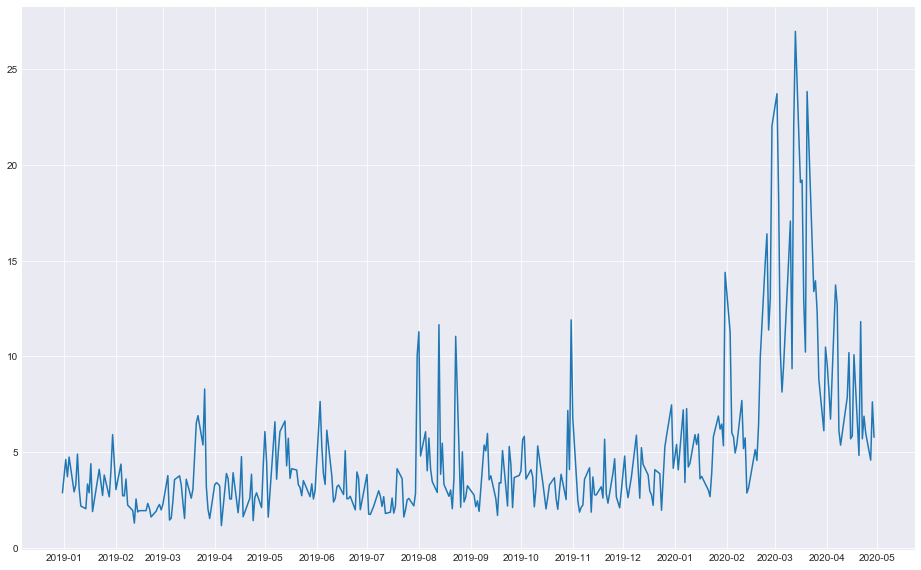

In [10]:
months = mdates.MonthLocator() # Get every year
dateFmt = mdates.DateFormatter('%Y-%m') # Set year format

# Create subplots to plot graph and control axes
fig, ax = plt.subplots()
ax.plot(df['Date'], df['Different'])

ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(dateFmt)

In [28]:
def get_close_stock_price(codes, start_date='2019-01-01', end_date='2020-04-30'):
    data = { code : yf.download(code, start_date, end_date) for code in codes }
    data = { key : pd.DataFrame(value, columns=['Close']).rename(columns={'Close': f'{key}_Close'}) for key, value in data.items() }
    df = None
    for key, value in data.items():
        if df is None:
            df = value
        else:
            df = df.merge(value, left_index=True, right_index=True)
    return df

df = get_close_stock_price(['AAPL', 'GOOGL', 'MSFT', 'AMZN', 'FB'])

def add_feature(df, codes, start_date='2019-01-01', end_date='2020-04-30'):
    data = { code : yf.download(code, start_date, end_date) for code in codes }
    data = { key : pd.DataFrame(value, columns=['Open']).rename(columns={'Open': f'{key}_Open'}) for key, value in data.items() }
    for key, value in data.items():
        df = df.merge(value, left_index=True, right_index=True)
    return df
df = add_feature(df, ['AAPL', 'GOOGL', 'MSFT', 'AMZN', 'FB'])
df.head(6)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,AAPL_Close,GOOGL_Close,MSFT_Close,AMZN_Close,FB_Close,AAPL_Open,GOOGL_Open,MSFT_Open,AMZN_Open,FB_Open
Date,,,,,,,,,,
2018-12-31,157.740005,1044.959961,101.570000,1501.969971,131.089996,158.529999,1057.829956,101.290001,1510.800049,134.449997
2019-01-02,157.919998,1054.680054,101.120003,1539.130005,135.679993,154.889999,1027.199951,99.550003,1465.199951,128.990005
2019-01-03,142.190002,1025.469971,97.400002,1500.280029,131.740005,143.979996,1050.670044,100.099998,1520.010010,134.690002
2019-01-04,148.259995,1078.069946,101.930000,1575.390015,137.949997,144.529999,1042.560059,99.720001,1530.000000,134.009995
2019-01-07,147.929993,1075.920044,102.059998,1629.510010,138.050003,148.699997,1080.969971,101.639999,1602.310059,137.559998
2019-01-08,150.750000,1085.369995,102.800003,1656.579956,142.529999,149.559998,1086.000000,103.040001,1664.689941,139.889999


In [29]:
df_plot = df.reset_index().melt('Date', var_name='cols',  value_name='vals')
df_plot.isna().values.any()

False

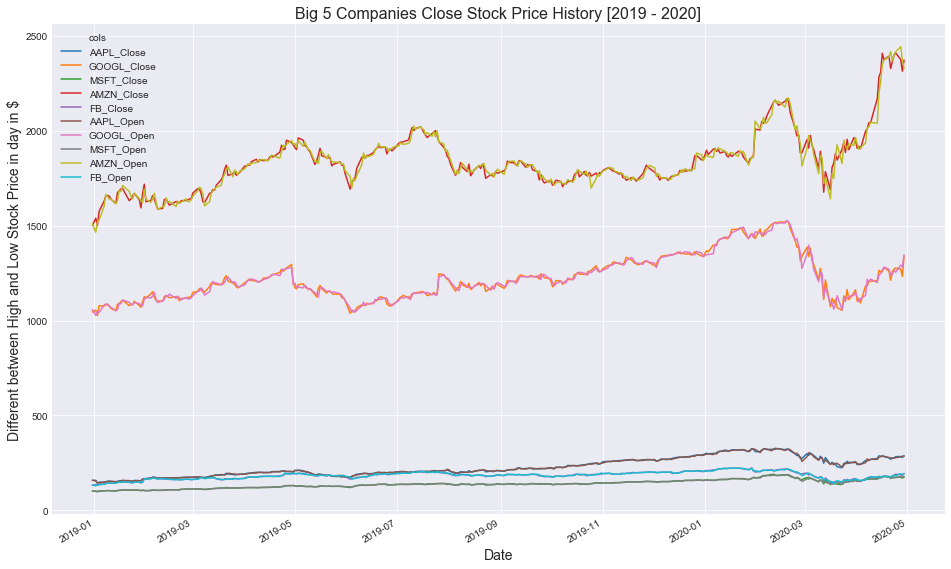

In [30]:
# Create subplots to plot graph and control axes
fig, ax = plt.subplots(figsize=(16,10))
sns.lineplot(x="Date", y="vals", hue='cols', data=df_plot)

# Format the ticks
loc = mdates.AutoDateLocator()
ax.xaxis.set_major_locator(loc)
ax.xaxis.set_major_formatter(mdates.AutoDateFormatter(loc))

# Set figure title
plt.title('Big 5 Companies Close Stock Price History [2019 - 2020]', fontsize=16)
# Set x label
plt.xlabel('Date', fontsize=14)
# Set y label
plt.ylabel('Different between High and Low Stock Price in day in $', fontsize=14)

# Rotate and align the x labels
fig.autofmt_xdate()

# Show plot
plt.show()

In [42]:
def get_features(raw_df):
    tmp = raw_df.values
    return tmp.reshape(-1)

def create_Xy(df, history=1):
    '''df has index as date
    columns are stock price of the companies
    '''
    X, y, dates = [], [], []
    for row_idx in range(history, len(df)):
        y.append( get_features(df.iloc[row_idx,5:]) )
        X.append( get_features(df.iloc[row_idx-history:row_idx,:]) )
        dates.append(df.index[row_idx])
    X, y = np.array(X), np.array(y)
    return X, y, dates

X,y,dates = create_Xy(df, history=5)
# use 7/10 of the dataset to train (use past price to predict future price)
n_train = len(y) * 7 // 10
X_train, y_train, dates_train, X_test, y_test, dates_test = X[:n_train], y[:n_train], dates[:n_train], X[n_train:], y[n_train:], dates[n_train:]

In [43]:
clf = LinearRegression()
clf.fit(X_train, y_train)
ypred = clf.predict(X_test)
clf.score(X_test, y_test)

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


0.939446804098396

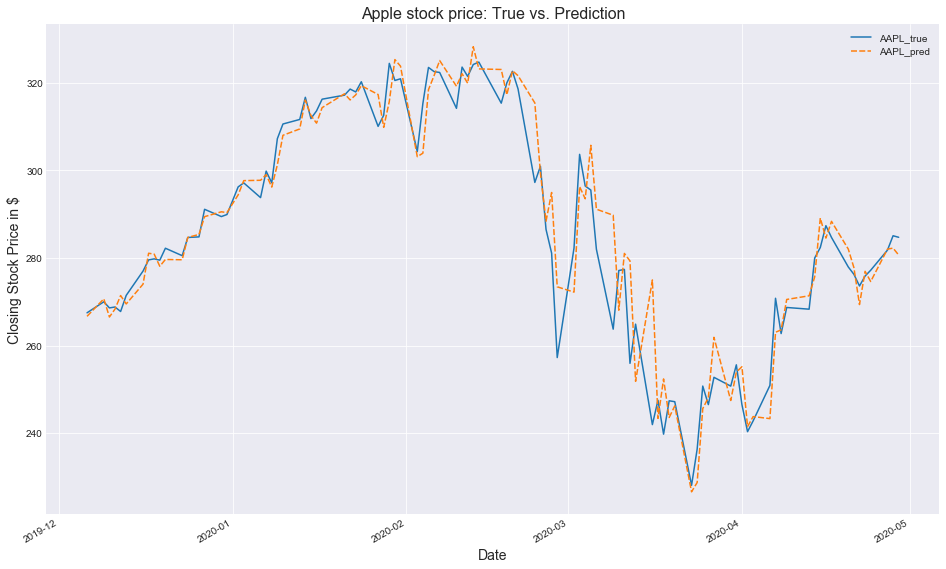

In [44]:
df_plot = pd.DataFrame({"AAPL_true": y_test[:,0], 'AAPL_pred': ypred[:,0]}, index=dates_test)
# Create subplots to plot graph and control axes
fig, ax = plt.subplots(figsize=(16,10))
sns.lineplot(data=df_plot)

# Format the ticks
loc = mdates.AutoDateLocator()
ax.xaxis.set_major_locator(loc)
ax.xaxis.set_major_formatter(mdates.AutoDateFormatter(loc))

# Set figure title
plt.title('Apple stock price: True vs. Prediction', fontsize=16)
# Set x label
plt.xlabel('Date', fontsize=14)
# Set y label
plt.ylabel('Closing Stock Price in $', fontsize=14)

# Rotate and align the x labels
fig.autofmt_xdate()

# Show plot
plt.show()

In [45]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

def mean_relative_error(y_true, y_pred):
    return np.mean(np.abs((y_pred-y_true)/y_true))
for i in range(5):
    print(mean_relative_error(y_test[:,i], ypred[:,i]))

0.016469786493863176
0.01680275894221068
0.015846695102755045
0.014745189175362236
0.023346110460414776
